<a href="https://colab.research.google.com/github/signofcommunication/Tugas-Matana-University/blob/master/UAS_Statistika_Kesehatan_%7C_Jeriko_%26_Benhard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn statsmodels openpyxl


=== DATA AWAL ===
         Provinsi  Laki-laki  Perempuan  Rata-Rata
0            ACEH      68.52      72.45     70.485
1  SUMATERA UTARA      68.36      72.30     70.330
2  SUMATERA BARAT      68.41      72.35     70.380
3            RIAU      70.56      74.58     72.570
4           JAMBI      70.09      74.09     72.090

=== STATISTIK DESKRIPTIF ===
       Laki-laki  Perempuan  Rata-Rata
count  39.000000  39.000000  39.000000
mean   68.636154  72.603333  70.619744
std     2.634092   2.651914   2.642378
min    62.830000  66.680000  64.755000
25%    66.960000  70.955000  68.957500
50%    69.000000  72.950000  70.975000
75%    70.355000  74.305000  72.330000
max    73.660000  77.400000  75.530000

=== UKURAN PEMUSATAN DATA ===
Mean:
 Laki-laki    68.636154
Perempuan    72.603333
Rata-Rata    70.619744
dtype: float64

Median:
 Laki-laki    69.000
Perempuan    72.950
Rata-Rata    70.975
dtype: float64

Mode:
 Laki-laki    65.050
Perempuan    66.680
Rata-Rata    64.755
Name: 0, dtype: floa

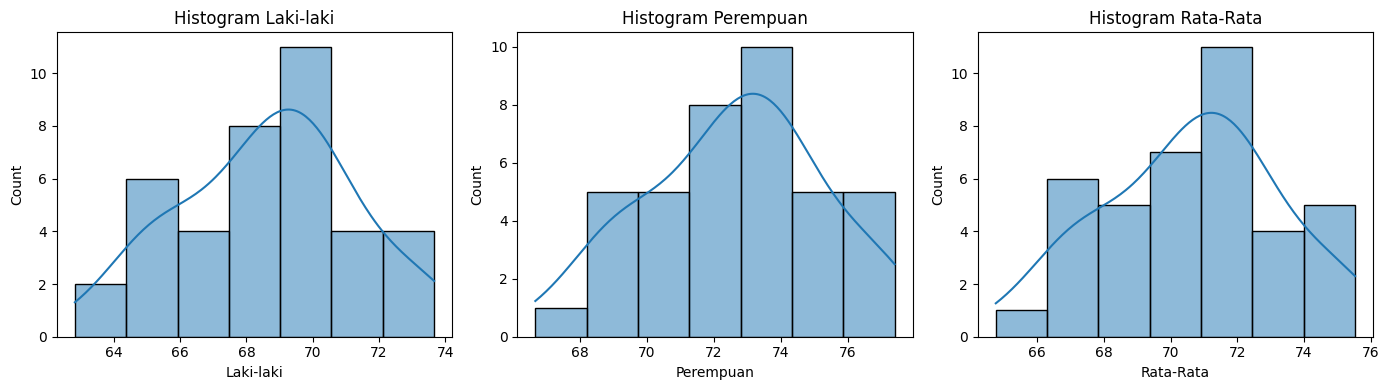

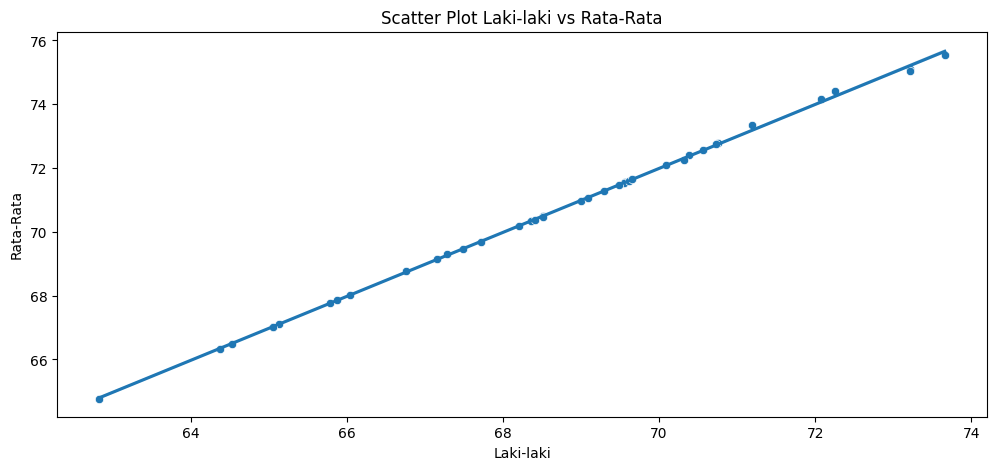

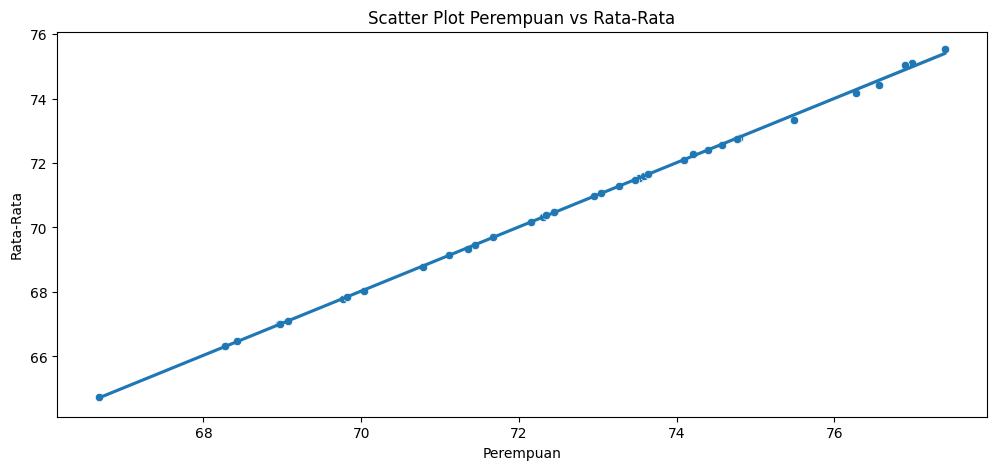


=== HASIL REGRESI ===
                            OLS Regression Results                            
Dep. Variable:              Rata-Rata   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.615e+27
Date:                Fri, 12 Dec 2025   Prob (F-statistic):               0.00
Time:                        04:24:20   Log-Likelihood:                 1082.0
No. Observations:                  39   AIC:                            -2158.
Df Residuals:                      36   BIC:                            -2153.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.684e-14   1.48e

In [3]:
# ============================================================
# IMPORT LIBRARIES
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# ============================================================
# LOAD DATA
# ============================================================
df = pd.read_excel("Data untuk UAS Statistika Kesehatan.xlsx", header=1)
df = df.rename(columns={"Unnamed: 0": "Provinsi"})

print("=== DATA AWAL ===")
print(df.head())


# ============================================================
# 2. STATISTIKA DESKRIPTIF
# ============================================================

print("\n=== STATISTIK DESKRIPTIF ===")
print(df[["Laki-laki","Perempuan","Rata-Rata"]].describe())

# Ukuran Pemusatan
print("\n=== UKURAN PEMUSATAN DATA ===")
print("Mean:\n", df[["Laki-laki","Perempuan","Rata-Rata"]].mean())
print("\nMedian:\n", df[["Laki-laki","Perempuan","Rata-Rata"]].median())
print("\nMode:\n", df[["Laki-laki","Perempuan","Rata-Rata"]].mode().iloc[0])

# Ukuran Penyebaran
print("\n=== UKURAN PENYEBARAN DATA ===")
print("Standard Deviasi:\n", df[["Laki-laki","Perempuan","Rata-Rata"]].std())
print("\nVarians:\n", df[["Laki-laki","Perempuan","Rata-Rata"]].var())
print("\nRange:\n", df[["Laki-laki","Perempuan","Rata-Rata"]].max() - df[["Laki-laki","Perempuan","Rata-Rata"]].min())

# ============================================================
# 2(c). GRAFIK
# ============================================================

# Histogram
plt.figure(figsize=(14,4))
for i, col in enumerate(["Laki-laki", "Perempuan", "Rata-Rata"], 1):
    plt.subplot(1,3,i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram {col}")
plt.tight_layout()
plt.show()

# Scatter Plot – hubungan dengan variabel respon
plt.figure(figsize=(12,5))
sns.scatterplot(x=df["Laki-laki"], y=df["Rata-Rata"])
sns.regplot(x=df["Laki-laki"], y=df["Rata-Rata"], scatter=False)
plt.title("Scatter Plot Laki-laki vs Rata-Rata")
plt.show()

plt.figure(figsize=(12,5))
sns.scatterplot(x=df["Perempuan"], y=df["Rata-Rata"])
sns.regplot(x=df["Perempuan"], y=df["Rata-Rata"], scatter=False)
plt.title("Scatter Plot Perempuan vs Rata-Rata")
plt.show()


# ============================================================
# 3. ANALISIS REGRESI LINEAR BERGANDA
# ============================================================

X = df[["Laki-laki", "Perempuan"]]
Y = df["Rata-Rata"]

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print("\n=== HASIL REGRESI ===")
print(model.summary())

# Menampilkan model regresi
b0, b1, b2 = model.params
print("\nMODEL REGRESI:")
print(f"Y = {b0:.4f} + {b1:.4f} * Laki-laki + {b2:.4f} * Perempuan")

# ============================================================
# INTERPRETASI OTOMATIS
# ============================================================

print("\n=== INTERPRETASI ===")

print(f"""
1. Setiap kenaikan 1 tahun angka harapan hidup laki-laki
   → menaikkan rata-rata sebesar {b1:.4f} tahun.

2. Setiap kenaikan 1 tahun angka harapan hidup perempuan
   → menaikkan rata-rata sebesar {b2:.4f} tahun.

3. Uji F (serentak):
   p-value = {model.f_pvalue:.6f}
   → {'Signifikan (Tolak H0)' if model.f_pvalue < 0.05 else 'Tidak signifikan (Gagal Tolak H0)'}
   → Variabel X1 & X2 berpengaruh bersama-sama terhadap Y.

4. Uji t (parsial):
   - Laki-laki: p = {model.pvalues['Laki-laki']:.6f}
     → {'Signifikan' if model.pvalues['Laki-laki'] < 0.05 else 'Tidak signifikan'}
   - Perempuan: p = {model.pvalues['Perempuan']:.6f}
     → {'Signifikan' if model.pvalues['Perempuan'] < 0.05 else 'Tidak signifikan'}

5. Kesimpulan:
   Kedua variabel memiliki hubungan positif dan signifikan terhadap Rata-Rata.
   Variabel 'Perempuan' memiliki pengaruh sedikit lebih besar.
""")
